<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Linear regression: Training and Validation Data </font></h1> 

# Table of Contents
In this lab, you will learn to select the best learning rate by using validation data.  

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data</a></li>
<li><a href="#ref1">Create a Linear Regression Object, Data Loader and Criterion Function</a></li>
<li><a href="#ref2">Different learning rates and Data Structures to Store results for Different Hyperparameters</a></li>
<li><a href="#ref3">Train different modules for different Hyperparameters</a></li>
<li><a href="#ref4">View Results </a></li>

<li><a href="#ref5">Practice Questions</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>30 min</strong>
</div>

<hr>

You'll need the following libraries:  

In [1]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

Set the random seed: 

In [2]:
torch.manual_seed(1)

<a id="ref0"></a>
<h2 align=center>Make Some Data </h2>

First, you'll create some artificial data in a dataset class. The class will include the option to produce training data or validation data. The training data will include outliers.

In [3]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self,train =True):
  
            self.x=torch.arange(-3,3,0.1).view(-1, 1)
            self.f=-3*self.x+1
            self.y=self.f+0.1*torch.randn(self.x.size())
            self.len=self.x.shape[0]
            #outliers 
            if train==True:
                self.y[0]=0
                self.y[50:55]=20
            else:
                pass
      
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

Create two objects: one that contains training data and a second that contains validation data. Assume that the training data has the outliers. 

In [4]:
train_data=Data()
val_data=Data(train=False)

Overlay the training points in red over the function that generated the data. Notice the outliers at x=-3 and around x=2:

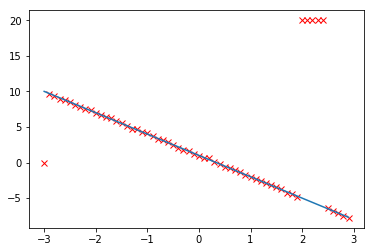

In [5]:
plt.plot(train_data.x.numpy(),train_data.y.numpy(),'xr')
plt.plot(train_data.x.numpy(),train_data.f.numpy())
plt.show()

<a id="ref1"></a>
<h2 align=center>Create a Linear Regression Object,  Data Loader, and Criterion Function </h2>

In [6]:
from torch import nn
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

Create the criterion function and a Data Loader object: 

In [7]:
criterion = nn.MSELoss()
trainloader=DataLoader(dataset=train_data,batch_size=1)

<a id="ref2"></a>
<h2 align=center>Different learning rates and Data Structures to Store results for different Hyperparameters </h2>

Create a list with different learning rates and a list for the training and testing cost/total loss. Include the list MODELS, which stores the training model for every value of the learning rate. 



In [8]:
learning_rates=[0.0001,0.001,0.01,0.1]
#this can be a list 

validation_error=torch.zeros(len(learning_rates))
training_error=torch.zeros(len(learning_rates))


MODELS=[]

<a id="ref3"></a>
<h2 align=center>Train different modules for different Hyperparameters </h2>

Try different values of learning rates, perform stochastic gradient descent, and save the results on the test data and validation data. Finally, save each model in a list.

In [9]:
epochs=10

#iterate through different learning rates 
for i,learning_rate in enumerate(learning_rates):
    #create a linear regression object 
    model=linear_regression(1,1)
    #create  an optimiser; the learning rate depends on what iteration of the loop you are in 
    optimizer = optim.SGD(model.parameters(), lr = learning_rate)
 
    for epoch in range(epochs):
        for x,y in trainloader:
            #make a prediction  
            yhat=model(x)
            #calculate the loss
            loss=criterion(yhat,y)
            #clear gradient 
            optimizer.zero_grad()
              
            #backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
            #the step function on an Optimizer makes an update to its parameters
            optimizer.step()
    #calculate the loss on the training and validation data save the results of each epoch in a  tensor      
    yhat=model(train_data.x)
    loss=criterion(yhat,train_data.y)
    
    training_error[i]=loss.item()
    MODELS.append(model)

    yhat=model(val_data.x)
    
    loss=criterion(yhat,val_data.y)
    validation_error[i]=loss.item()
    # save the models in a list 
    MODELS.append(model)

<a id="ref4"></a>
<h2 align=center>View the Results </h2>

Print out the training loss and testing loss for each learning rate:  

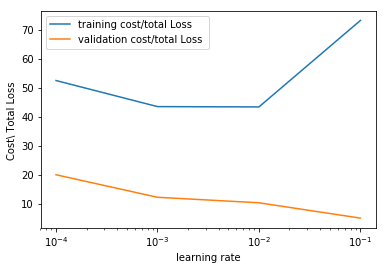

In [10]:
plt.semilogx(np.array(learning_rates),training_error.numpy(),label='training cost/total Loss')
plt.semilogx(np.array(learning_rates),validation_error.numpy(),label='validation cost/total Loss ')
plt.ylabel('Cost\ Total Loss ')
plt.xlabel('learning rate')
plt.legend()
plt.show()

Produce a prediction by using the validation data for each model:  

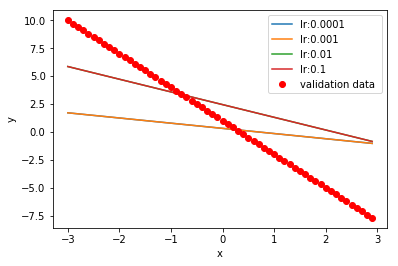

In [11]:
for model,learning_rate in zip(MODELS, learning_rates):
    

    yhat=model(val_data.x)
    plt.plot(val_data.x.numpy(),yhat.detach().numpy(),label='lr:'+str(learning_rate))
    
plt.plot(val_data.x.numpy(),val_data.f.numpy(),'or',label='validation data ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<a id="ref4"></a>
<h2 align=center>Practice Question </h2>

The object <code>good_model</code> is the best performing model. Use the train loader to get the data samples x and y. Produce an estimate for yhat and print it out for every sample in a for a loop. Compare it to the actual prediction y.

In [12]:
good_model=MODELS[2]
for x,y in trainloader:
    print("yhat=",good_model(x),"y",y)

yhat= tensor([[5.8555]], grad_fn=<ThAddmmBackward>) y tensor([[0.]])
yhat= tensor([[5.7418]], grad_fn=<ThAddmmBackward>) y tensor([[9.6250]])
yhat= tensor([[5.6282]], grad_fn=<ThAddmmBackward>) y tensor([[9.3346]])
yhat= tensor([[5.5145]], grad_fn=<ThAddmmBackward>) y tensor([[8.9391]])
yhat= tensor([[5.4009]], grad_fn=<ThAddmmBackward>) y tensor([[8.7900]])
yhat= tensor([[5.2872]], grad_fn=<ThAddmmBackward>) y tensor([[8.4391]])
yhat= tensor([[5.1735]], grad_fn=<ThAddmmBackward>) y tensor([[8.1020]])
yhat= tensor([[5.0599]], grad_fn=<ThAddmmBackward>) y tensor([[7.7391]])
yhat= tensor([[4.9462]], grad_fn=<ThAddmmBackward>) y tensor([[7.5288]])
yhat= tensor([[4.8326]], grad_fn=<ThAddmmBackward>) y tensor([[7.3304]])
yhat= tensor([[4.7189]], grad_fn=<ThAddmmBackward>) y tensor([[6.9223]])
yhat= tensor([[4.6053]], grad_fn=<ThAddmmBackward>) y tensor([[6.6749]])
yhat= tensor([[4.4916]], grad_fn=<ThAddmmBackward>) y tensor([[6.3778]])
yhat= tensor([[4.3780]], grad_fn=<ThAddmmBackward>) y t

Double-click __here__ for the solution.

<!-- 
for x,y in trainloader:
    print("yhat=",good_model(x),"y",y)


-->

### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/) 

 <hr>
Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).